In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from datetime import datetime, date, timedelta

In [6]:
%matplotlib inline

### Tasks


In [7]:
# set up empty DataFrame
df=pd.DataFrame(columns=['Task','Start','End','Color', 'Fontsize'])

# define work packages etc
Tasks=[
    ['$\mathbf{WP1\/Inverse\/Design}$','2018-10-1','2020-9-30','blue', 12],
    ['T1.1 IDML code - Materials Prediction','2018-10-1','2020-9-30','gray', 10],
    ['T1.2 Experimental data interpretation','2019-4-1','2020-9-30','gray', 10],
    ['$\mathbf{WP2\/Materials\/Discovery}$','2018-10-1','2021-9-30','blue', 12],
    ['T2.1 Mn-based oxides','2018-10-1','2020-9-30','gray', 10],
    ['T2.2 Ir/Ru-based oxides','2018-10-1','2021-9-30','gray', 10],
    ['$\mathbf{WP3\/Synthesis\/and\/Characterization}$','2019-10-1','2021-11-30','blue', 12],
    ['T3.1 Materials synthesis','2019-10-1','2021-9-30','gray', 10],
    ['T3.2 Ex situ/in situ XRD','2020-1-1','2021-11-30','gray', 10],
    ['T3.3 Electrochem. characterization','2020-1-1','2021-11-30','gray', 10],
    ['$\mathbf{WP4\/Management\/and\/Dissemination}$','2018-10-1','2021-12-31','blue', 12],
    ['T4.1 Progess meetings & reports','2018-10-1','2021-12-31','none', 10],
    ['T4.2 Open source database','2020-4-1','2021-11-30','gray', 10]
    ] #first items on bottom

# reverse order of task list
for i,Dat in enumerate(Tasks[::-1]):
    df.loc[i]=Dat

# convert date strings to datetime fields:
df.Start=pd.to_datetime(df.Start)
df.End=pd.to_datetime(df.End)

# display DataFrame
df

,Task,Start,End,Color,Fontsize
0,T4.2 Open source database,2020-04-01,2021-11-30,gray,10
1,T4.1 Progess meetings & reports,2018-10-01,2021-12-31,none,10
2,$\mathbf{WP4\/Management\/and\/Dissemination}$,2018-10-01,2021-12-31,blue,12
3,T3.3 Electrochem. characterization,2020-01-01,2021-11-30,gray,10
4,T3.2 Ex situ/in situ XRD,2020-01-01,2021-11-30,gray,10
5,T3.1 Materials synthesis,2019-10-01,2021-09-30,gray,10
6,$\mathbf{WP3\/Synthesis\/and\/Characterization}$,2019-10-01,2021-11-30,blue,12
7,T2.2 Ir/Ru-based oxides,2018-10-01,2021-09-30,gray,10
8,T2.1 Mn-based oxides,2018-10-01,2020-09-30,gray,10
9,$\mathbf{WP2\/Materials\/Discovery}$,2018-10-01,2021-09-30,blue,12


### Milestones

In [8]:
# define Milestones

df_m =pd.DataFrame(columns=['Milestone_id','Description', 'Project_Month','Task_Index'])

Milestones = [['M1', 'IDML code v1.0 ready', 9, 11], 
              ['M2', '1st Mn-based oxides proposed by IDML', 12, 8],
              ['M3', '1st Ir/Ru-based oxides proposed by IDML', 15, 7],
              ['M4', '1st IDML spectra analysis completed', 15, 10],
              ['M5', '1st new Mn-based oxides synthesized', 18, 5],
              ['M6', '1st new Ir/Ru-based oxides synthesized', 21, 4],
              ['M7', 'In situ XRD completed', 36, 4],
              ['M8', 'Electrochemical analysis completed', 36, 3],
              ['M9', 'Open source database launched', 38, 0]]

# add milestone data to DataFrame
for i,M in enumerate(Milestones):
    df_m.loc[i]=M

# make a date range with monthly resolution for whole project period
proj_months = pd.date_range(start='2018-10-01', end='2021-12-31', freq='M')
    
# get milestone month indices
milestone_date_indices = df_m['Project_Month'].values.astype(int)-1

# select months with milestones and add to DataFrame
df_m['Milestone_Dates'] = proj_months[milestone_date_indices]

df_m

,Milestone_id,Description,Project_Month,Task_Index,Milestone_Dates
0,M1,IDML code v1.0 ready,9,11,2019-06-30
1,M2,1st Mn-based oxides proposed by IDML,12,8,2019-09-30
2,M3,1st Ir/Ru-based oxides proposed by IDML,15,7,2019-12-31
3,M4,1st IDML spectra analysis completed,15,10,2019-12-31
4,M5,1st new Mn-based oxides synthesized,18,5,2020-03-31
5,M6,1st new Ir/Ru-based oxides synthesized,21,4,2020-06-30
6,M7,In situ XRD completed,36,4,2021-09-30
7,M8,Electrochemical analysis completed,36,3,2021-09-30
8,M9,Open source database launched,38,0,2021-11-30


### Gantt Chart

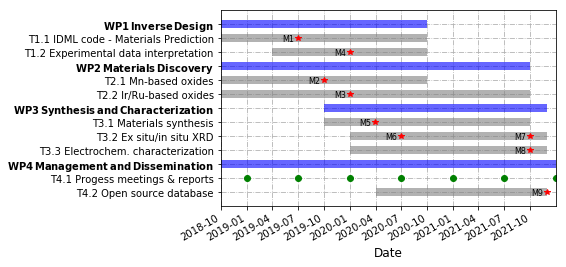

In [13]:
# designate variables
x2 = df.End.values
x1 = df.Start.values
y = df.index.astype(np.int)
names = df.Task.values

labs, tickloc, col = [], [], []

# colors
color = df.Color.tolist()

# set up figure canvas and plot axes
plt.figure(figsize=(35,3))
fig, ax = plt.subplots()

# generate a line and line properties for each task
for i in range(len(y)):
    c=color[i]
    
    plt.hlines(i+1, x1[i], x2[i], label=y[i], color=c, linewidth=8 ,alpha=0.6)
    labs.append(names[i])
    tickloc.append(i+1)
    col.append(c)

# set y limits
ax.set_ylim(0,len(y)+1)
plt.yticks(tickloc, labs, fontsize=10)

# create custom date labels using Pandas' data range tools
xlabels = pd.date_range(start=df.Start.min(), end=df.End.max(), freq='3MS')

# set x-axis tick locations
plt.xticks(xlabels, xlabels)

# set x-axis limits
ax.set_xlim(df.Start.min(),df.End.max())

# set x-axis label
ax.set_xlabel('Date', fontsize=12)

# modify date labels
dateFmt = dates.DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(dateFmt)
fig.autofmt_xdate()

# add grid lines
plt.grid(ls='-.')

# set chart title
#plt.title('InDeCat Project Schedule')

# plot dots every six months on T4.1 line (y = 2) for project meetings
x_dots = pd.date_range(start='2019-01-01', periods=7, freq='6MS')
ax.plot(x_dots, 2*np.ones(len(x_dots)),'go', ms=6)

# plot stars to indicate milestone deadlines
ax.plot(df_m['Milestone_Dates'], df_m['Task_Index']+1, marker='*', ms=6, color='red', ls='')

# add text with Milestone label to each milestone marker

texts = []

for i, txt in enumerate( df_m['Milestone_id'] ):
    texts.append(ax.text(df_m['Milestone_Dates'].loc[i]+pd.DateOffset(days=-55), df_m['Task_Index'].loc[i]+0.75, txt, fontsize=8))

# save the figure, use kwarg bbox_inches='tight' to fit the whole graph on canvas

#plt.savefig('InDeCat_gantt_v3.png', bbox_inches='tight', dpi=300);
#plt.show()